<a href="https://colab.research.google.com/github/mrinaligupta255/Practice-on-Keras-Library/blob/master/CNN_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.utils import to_categorical

import matplotlib.pyplot as plt



In [0]:
#import the data from the mnist dataset
seed=3
np.random.seed(seed)
(x_train,y_train),(x_test,y_test)=mnist.load_data()

shape of trainig set: (60000, 28, 28)
shape of test set: (10000, 28, 28)


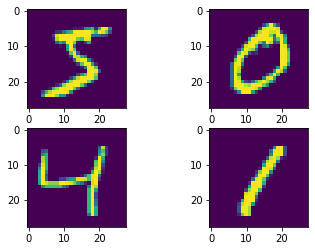

In [33]:
plt.subplot(221)
plt.imshow(x_train[0])
plt.subplot(222)
plt.imshow(x_train[1])
plt.subplot(223)
plt.imshow(x_train[2])
plt.subplot(224)
plt.imshow(x_train[3])
print('shape of trainig set:',x_train.shape)
print('shape of test set:',x_test.shape)


In [34]:
num_input=x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(x_train.shape[0],num_input)
x_test=x_test.reshape(x_test.shape[0],num_input)
x_train=x_train/255
x_test=x_test/255
print('shape of trainig set:',x_train.shape)
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)




shape of trainig set: (60000, 784)


In [35]:
# using simple neural network
model=Sequential()
model.add(Dense(num_input,input_dim=num_input,kernel_initializer='normal',activation='relu'))
model.add(Dense(10,kernel_initializer='normal',activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=200,verbose=2)

scores=model.evaluate(x_test,y_test,verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2791 - acc: 0.9207 - val_loss: 0.1394 - val_acc: 0.9587
Epoch 2/10
 - 6s - loss: 0.1116 - acc: 0.9684 - val_loss: 0.0967 - val_acc: 0.9711
Epoch 3/10
 - 6s - loss: 0.0716 - acc: 0.9791 - val_loss: 0.0799 - val_acc: 0.9768
Epoch 4/10
 - 6s - loss: 0.0502 - acc: 0.9855 - val_loss: 0.0749 - val_acc: 0.9775
Epoch 5/10
 - 6s - loss: 0.0368 - acc: 0.9892 - val_loss: 0.0630 - val_acc: 0.9813
Epoch 6/10
 - 6s - loss: 0.0268 - acc: 0.9929 - val_loss: 0.0655 - val_acc: 0.9785
Epoch 7/10
 - 6s - loss: 0.0197 - acc: 0.9952 - val_loss: 0.0610 - val_acc: 0.9810
Epoch 8/10
 - 6s - loss: 0.0157 - acc: 0.9963 - val_loss: 0.0583 - val_acc: 0.9820
Epoch 9/10
 - 6s - loss: 0.0115 - acc: 0.9977 - val_loss: 0.0589 - val_acc: 0.9822
Epoch 10/10
 - 6s - loss: 0.0082 - acc: 0.9985 - val_loss: 0.0591 - val_acc: 0.9823
Loss: 94.09421319145419


In [37]:
print('scores:',scores)
print("Error:",100-scores[1]*100,'%')

scores: [0.059057868085458175, 0.9823]
Loss: 1.7700000000000102 %


In [61]:
#using convlotional neural network with conv and pooling layer
np.random.seed(seed)
(x_train1,y_train1),(x_test1,y_test1)=mnist.load_data()
x_train1=x_train1.reshape(x_train1.shape[0],28,28,1)
x_test1=x_test1.reshape(x_test1.shape[0],28,28,1)
x_train1=x_train1/255
x_test1=x_test1/255
print('shape of trainig set:',x_train1.shape)
y_train1=to_categorical(y_train1)
y_test1=to_categorical(y_test1)



shape of trainig set: (60000, 28, 28, 1)


In [63]:
conv_model=Sequential()
conv_model.add(Conv2D(32,(5,5),activation='relu',padding='valid',input_shape=(28,28,1)))
conv_model.add(MaxPooling2D(pool_size=(2,2)))
conv_model.add(Flatten())
conv_model.add(Dense(128,activation='relu'))
conv_model.add(Dense(10,activation='softmax'))
conv_model.summary()
conv_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

conv_model.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=10,batch_size=200,verbose=2)

scores=conv_model.evaluate(x_test1,y_test1,verbose=0)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 27s - loss: 0.2467 - acc: 0.9280 - val_loss: 0.07

In [64]:
print('scores:',scores)
print("CNN Error:",100-scores[1]*100,'%')

scores: [0.04264218516360561, 0.9867]
CNN Error: 1.3299999999999983 %
